<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_3_stat_part_2/Stepik_data_analysis_R_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("gvlma")
library("gvlma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 3_6_5

Используем данные mtcars. Сохраните в переменную логистическую регрессионную модель, где в качестве зависимой переменной выступает тип коробки передач (am), в качестве предикторов переменные disp, vs, mpg.

Значения коэффициентов регрессии сохраните в переменную log_coef.

In [ ]:
fit <- glm(mtcars$am ~ mtcars$disp + mtcars$vs + mtcars$mpg, family = "binomial")
summary(fit)


Call:
glm(formula = mtcars$am ~ mtcars$disp + mtcars$vs + mtcars$mpg, 
    family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.89136    7.26516   0.260   0.7946  
mtcars$disp -0.02525    0.01562  -1.617   0.1059  
mtcars$vs   -5.45385    2.79897  -1.949   0.0514 .
mtcars$mpg   0.28419    0.24442   1.163   0.2450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.23  on 31  degrees of freedom
Residual deviance: 19.90  on 28  degrees of freedom
AIC: 27.9

Number of Fisher Scoring iterations: 6


In [ ]:
fit <- glm(mtcars$am ~ mtcars$disp + mtcars$vs + mtcars$mpg, family = "binomial")
log_coef <- fit$coefficients

In [ ]:
log_coef <- glm(am ~ disp + vs + mpg, mtcars, family = "binomial")$coefficients

# 3_6_6

Дополните предложенный в задании код, чтобы построить следующий график по данным ToothGrowth.
Изобразите различия длины зубов морских свинок в различных условиях дозировки и типа потребляемого продукта.

По оси x - переменная supp.
По оси y - переменная len.
Цвет ящиков с усами (boxplot) - переменная dose.

Если все правильно, то должен получиться следующий график:

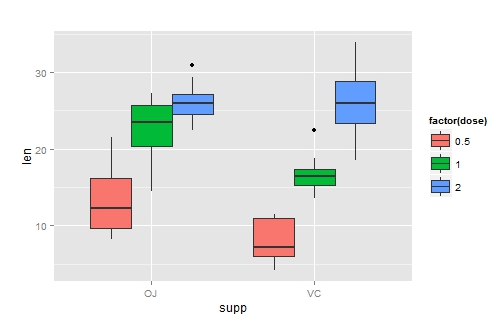

In [ ]:
install.packages("ggplot2")
library("ggplot2")

# obj <- ggplot(data = ToothGrowth, aes())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "numeric"

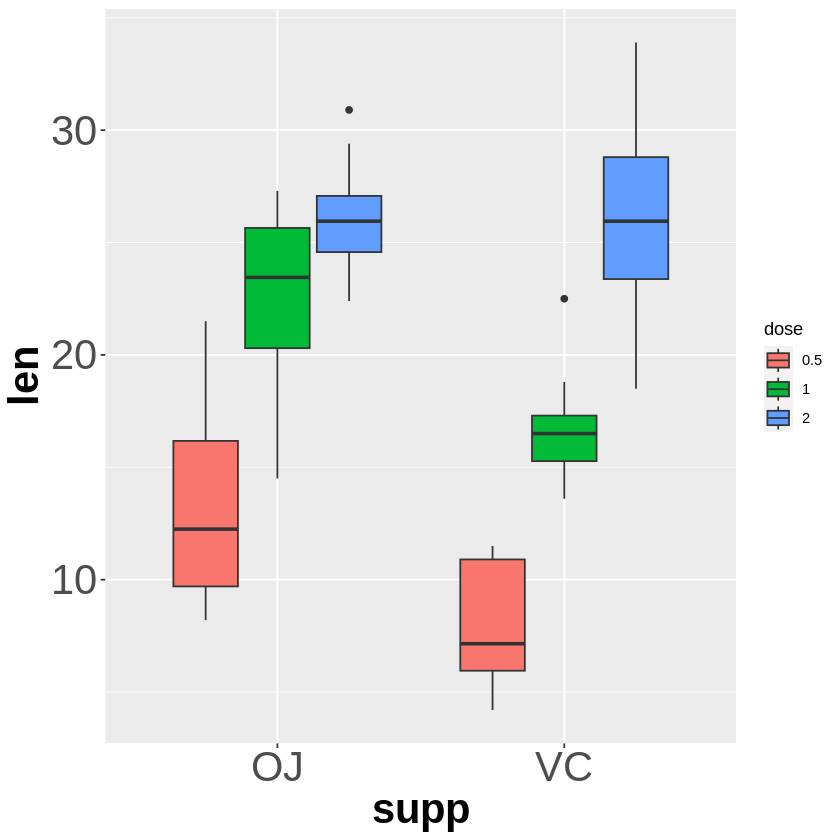

In [ ]:
df <- ToothGrowth #записали в переменную датасет
class(df$dose) # увидели, чтр переменная dose имеет тип numeric , а не фактор . А нам надо фактор , чтобы закрасить ящики цветом
df$dose <- as.factor(df$dose) # перевели переменную dose в тип фактор
ggplot(df, aes(supp, len, fill = dose))+ # по оси х -supp , по оси у - len , цвет в зависимости от фактора dose
  geom_boxplot()+ #указали что нужны ящики с усами
  theme(axis.text=element_text(size=25),
        axis.title=element_text(size=25,face="bold"))

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


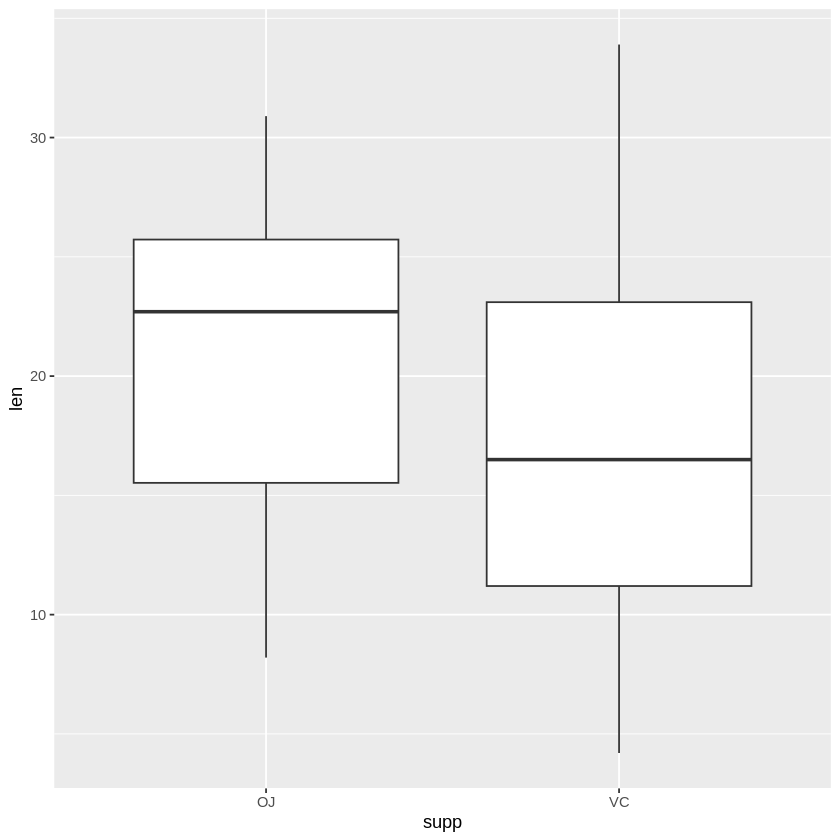

In [ ]:
obj <- ggplot(data = ToothGrowth, aes(supp, len, fill = dose)) +
  geom_boxplot()

obj

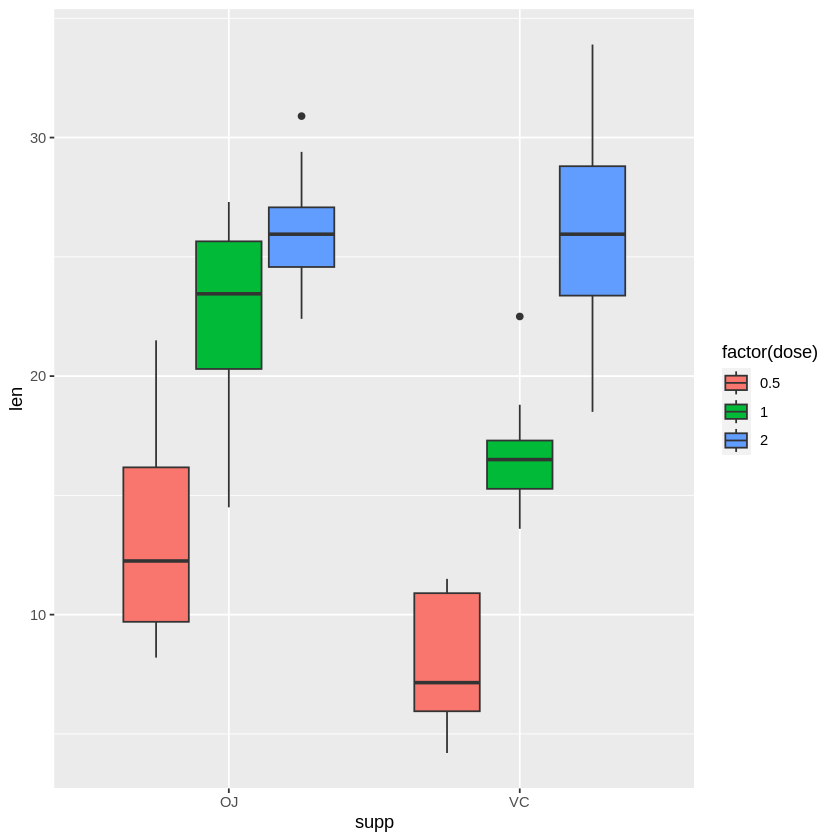

In [ ]:
obj <- ggplot(data = ToothGrowth, aes(supp, len, fill = factor(dose))) +
  geom_boxplot()

obj

In [ ]:
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(pd.read_csv('ToothGrowth.csv'))

# sns.boxplot(data=df, x='supp', y='len', hue='dose', order=['OJ', 'VC'])
# plt.show()

# 3_6_9



Используем модельные данные о соотношении среднего и высшего образования в американских школах. Данные доступны по ссылке: https://stepik.org/media/attachments/lesson/11478/data.csv Про часть испытуемых известно, поступили они в университет или нет (переменная admit, 1 = поступили, 0 = не поступили), про остальных таких данных нет (NA). Описание данных (обратите на него внимание при проведении подсчётов):

'data.frame':  400 obs. of  4 variables:

 $ admit: Factor w/ 2 levels "0","1": 1 2 NA NA 1 2 NA NA 2 1 ...

 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...

 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...

 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...

По имеющимся данным в переменной admit постройте логистическую регрессионную модель, предсказывающую результат поступления по престижности учебного заведения среднего образования (переменная rank, 1 — наиболее престижное, 4 — наименее престижное) и результатов GPA (переменная gpa) с учётом их взаимодействия. Примените эту модель к той части данных, где результат поступления неизвестен.

Ответом в задаче будет предсказанное моделью число поступивших из тех, для кого результат поступления был неизвестен. Считаем человека поступившим, когда вероятность его поступления не меньше 0.4.

In [ ]:
# data <- читаем данные
# indxes_na <-                                    # 1) ищем индексы строк с NA
# d_rm_na <-                                       #  2) берем данные без NA
# d_na <-                                              #  3) берем данные с NA
# fit <- glm(...)                                      #  4) формируем модель по данным без NA
# d_na$p.value <- predict(...)             # 5) записываем предсказания для данных с NA в новый столбец p.value
# nrow(d_na[d_na$p.value >= 0.4,])  # 6) считаем строки с предсказанием о поступлении для данных с NA

In [1]:
data <- read.csv('https://stepik.org/media/attachments/lesson/11478/data.csv')
head(data)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,NA,800,4.00,1
4,NA,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [2]:
length(data$admit)

[1] 400

In [3]:
is.na(data$admit)

[1] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [25]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [37]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [49] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [61] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [73] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [85] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [97] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[121] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[133]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[157]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[169] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[193] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[205]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[217] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[229]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[241]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[253]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[265]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
[277]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[289] FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[301] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[313] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[325] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[337] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[349]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[361] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[397] FALSE FALSE FALSE  TRUE

In [4]:
which(is.na(data$admit))

[1]   3   4   7   8  11  12  19  20  22  23  25  35  37  41  42  43  44  45
 [19]  46  48  51  56  57  58  60  64  65  68  69  70  74  75  76  78  79  80
 [37]  82  83  88  89  91  93  94  95  96  98  99 100 103 104 105 106 107 108
 [55] 109 110 114 117 122 129 131 132 133 142 151 155 156 157 159 164 170 171
 [73] 174 177 178 180 181 182 183 184 189 191 192 196 198 203 204 205 208 209
 [91] 211 212 213 214 215 222 223 225 227 229 231 233 234 237 239 240 241 243
[109] 244 247 249 250 251 252 253 254 257 258 265 266 267 269 270 272 275 277
[127] 278 279 281 282 283 284 285 287 290 293 295 297 298 304 305 309 312 315
[145] 318 322 323 324 327 329 333 334 335 336 338 342 345 347 348 349 351 355
[163] 356 358 365 368 369 379 381 384 394 400

In [5]:
indexes_na <- which(is.na(data$admit))

In [7]:
# subset(data[-indexes_na,])

In [8]:
d_rm_na <- subset(data[-indexes_na,])
head(d_rm_na)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
5,0,520,2.93,4
6,1,760,3.00,2
9,1,540,3.39,3
10,0,700,3.92,2


In [9]:
d_na <- subset(data[indexes_na,])
head(d_na)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
3,NA,800,4.00,1
4,NA,640,3.19,4
7,NA,560,2.98,1
8,NA,400,3.08,2
11,NA,800,4.00,4
12,NA,440,3.22,1


In [10]:
fit <- glm(d_rm_na$admit ~ d_rm_na$rank * d_rm_na$gpa)
# summary(fit)

In [11]:
head(predict(object = fit))

1           2           3           4           5           6 
0.290793068 0.302440801 0.001806811 0.328038732 0.248084716 0.489363084

In [12]:
length(predict(object = fit, type = "response"))

[1] 228

In [13]:
length((predict(fit, newdata = data[is.na(data$admit),], type = "response")))

Warning message:
“'newdata' had 172 rows but variables found have 228 rows”


[1] 228

In [14]:
length(predict(object = fit, newdata = d_na, type = "response"))

Warning message:
“'newdata' had 172 rows but variables found have 228 rows”


[1] 228

In [18]:
d_na$prop <- (predict(fit, newdata = d_na, type = "response"))

Warning message:
“'newdata' had 172 rows but variables found have 228 rows”


ERROR: ignored

In [17]:
head(d_na)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
3,NA,800,4.00,1
4,NA,640,3.19,4
7,NA,560,2.98,1
8,NA,400,3.08,2
11,NA,800,4.00,4
12,NA,440,3.22,1


In [30]:
# data <- read.csv('https://stepik.org/media/attachments/lesson/11478/data.csv')
df <- read.csv("https://stepik.org/media/attachments/lesson/11478/data.csv")
str(df)
df_without_na <- subset(df, is.na(df$admit) == F)
model <- glm (admit~ rank * gpa, data=df_without_na, family = 'binomial')
df_na <- subset(df, is.na(df$admit) == T)
df_na$prop <- predict(model, newdata = df_na, type = "response")
sum(df_na$prop >= 0.4)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 NA NA 0 1 NA NA 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


[1] 56

In [28]:
head(df_without_na)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
5,0,520,2.93,4
6,1,760,3.00,2
9,1,540,3.39,3
10,0,700,3.92,2


In [35]:
data <- read.csv('https://stepik.org/media/attachments/lesson/11478/data.csv')
indexes_na <- which(is.na(data$admit))
d_rm_na <- subset(data[-indexes_na,])
d_na <- subset(data[indexes_na,])
# fit <- glm(d_rm_na$admit ~ d_rm_na$rank * d_rm_na$gpa)
model <- glm (admit ~ rank * gpa, data=d_rm_na, family = 'binomial')
d_na$prop <- (predict(model, newdata = d_na, type = "response"))
sum(df_na$prop >= 0.4)

[1] 56

In [29]:
head(d_rm_na)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
5,0,520,2.93,4
6,1,760,3.00,2
9,1,540,3.39,3
10,0,700,3.92,2


In [ ]:
dta1 <- read.csv("data.csv")
dta1$admit <- factor(dta1$admit, labels = c("N", "Y"))
dta1$rank <- factor(dta1$rank, labels = c("A","B","C","D"))
fit11 <- glm( admit ~ rank*gpa, dta1, family = "binomial", na.action = na.exclude)
sum((predict(fit11, newdata = dta1[fit11$na.action, c("gpa", "rank")], type="response"))>0.4)